In [15]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.randint(0,10,size=(10,2))
print("Original data")
print(data)

#print("Original data")
#plt.scatter(X[:,0], X[:,1])

X_stand = (X-np.mean(X, axis=0))/np.std(X)
print("Standardized data")
print(X_stand)

Original data
[[9 9]
 [1 2]
 [0 3]
 [2 6]
 [4 4]
 [7 1]
 [4 3]
 [6 1]
 [5 1]
 [1 7]]
Standardized data
[[-0.62230759  1.06681302]
 [ 1.1557141   1.36314996]
 [ 1.1557141   0.47413912]
 [-0.62230759  1.36314996]
 [-1.21498149 -0.71120868]
 [ 1.1557141  -0.41487173]
 [ 0.5630402  -0.71120868]
 [ 0.85937715  0.17780217]
 [-1.21498149 -1.30388258]
 [-1.21498149 -1.30388258]]


In [16]:
def pca_scratch(X_stand, k):
    
    # Find the covariance matrix
    cov_matrix = np.cov(X_stand, rowvar=False)
    # Find the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    # Find the right "order" of the eigenvalues and eigenvectors (largest >> smallest)
    sortindex = np.argsort(eigenvalues)[::-1]
    # Apply the index to the eigenvalues and the eigenvectors and take the first "k" components
    sorted_eigenvalues = eigenvalues[sortindex]
    sorted_eigenvectors = eigenvectors[:, sortindex]
    eigenvalues_set = sorted_eigenvalues[:k]
    eigenvectors_set = sorted_eigenvectors[:, :k]

    # Find the variance of the selected
    eigenvalues_sum = np.sum(eigenvalues_set)
    eig_length = np.linalg.norm(eigenvalues_set)
    var = eigenvalues_sum/eig_length
    # Find the transformed dataset
    X_pca = np.dot(eigenvectors_set.transpose(), X_stand.transpose()).transpose()

    return X_pca, var
    

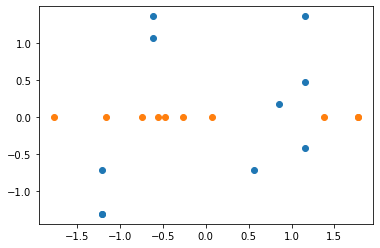

In [21]:
X_pca, var = pca_scratch(X_stand, 1)

plt.scatter(X_stand[:,0], X_stand[:,1])
plt.scatter(X_pca[:,0], np.zeros(10))